## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from keras.datasets import cifar10
from Day_100_resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# 建立 ResNet 模型
model = resnet(input_shape=(32,32,3)) 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [4]:
data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [5]:
batch_size = 128 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 30 # 訓練整個資料集共 30個循環

model.compile(loss='categorical_crossentropy',
              #optimizer=Adam(),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(data_generator.flow(x_train, y_train, batch_size),
                              steps_per_epoch=int(len(x_train)/batch_size),
                              epochs=epochs, 
                              verbose=1, 
                              validation_data=(x_test, y_test))

Epoch 1/30
390/390 [==============================] - 94s 240ms/step - loss: 2.0216 - accuracy: 0.4653 - val_loss: 1.7213 - val_accuracy: 0.5598
Epoch 2/30
390/390 [==============================] - 85s 217ms/step - loss: 1.5693 - accuracy: 0.6058 - val_loss: 1.5571 - val_accuracy: 0.6068
Epoch 3/30
390/390 [==============================] - 85s 218ms/step - loss: 1.3724 - accuracy: 0.6605 - val_loss: 1.7310 - val_accuracy: 0.5822
Epoch 4/30
390/390 [==============================] - 85s 218ms/step - loss: 1.2353 - accuracy: 0.6980 - val_loss: 1.4497 - val_accuracy: 0.6276
Epoch 5/30
390/390 [==============================] - 86s 219ms/step - loss: 1.1204 - accuracy: 0.7329 - val_loss: 1.4019 - val_accuracy: 0.6698
Epoch 6/30
390/390 [==============================] - 86s 219ms/step - loss: 1.0377 - accuracy: 0.7569 - val_loss: 1.3318 - val_accuracy: 0.6718
Epoch 7/30
390/390 [==============================] - 86s 219ms/step - loss: 0.9693 - accuracy: 0.7766 - val_loss: 1.2495 - val_ac

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8133193358421326
Test accuracy: 0.8136000037193298


In [8]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

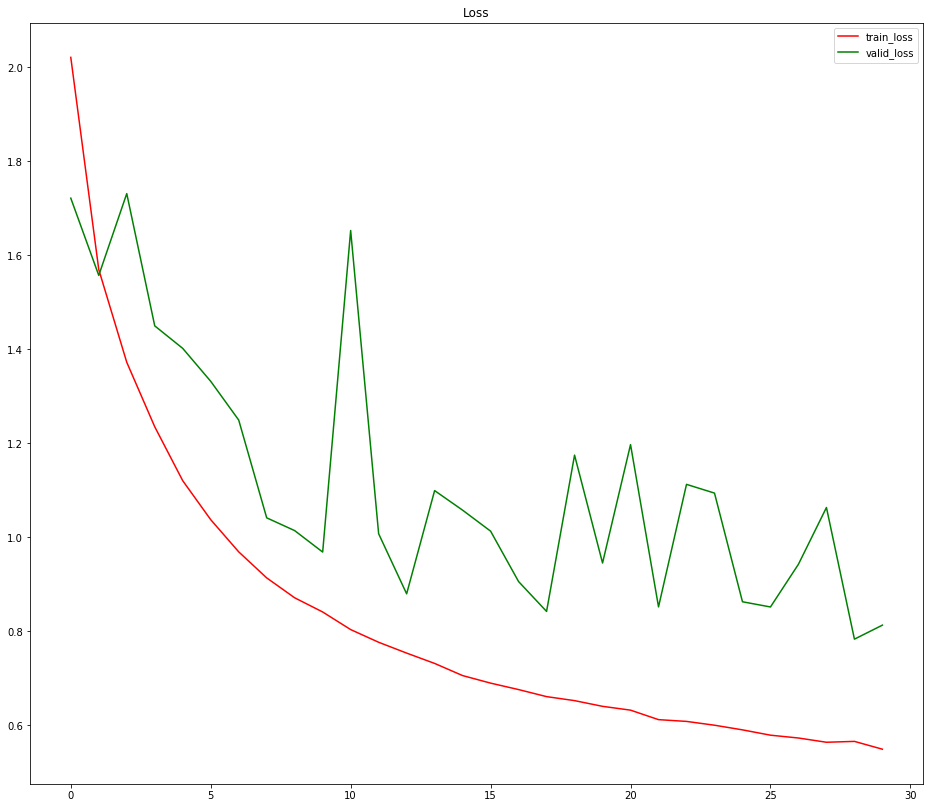

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
plt.plot(range(len(train_loss)),train_loss, '-', label='train_loss', color=color_bar[0])
plt.plot(range(len(valid_loss)),valid_loss, '-', label='valid_loss', color=color_bar[1])
plt.title("Loss")
plt.legend()
plt.show()

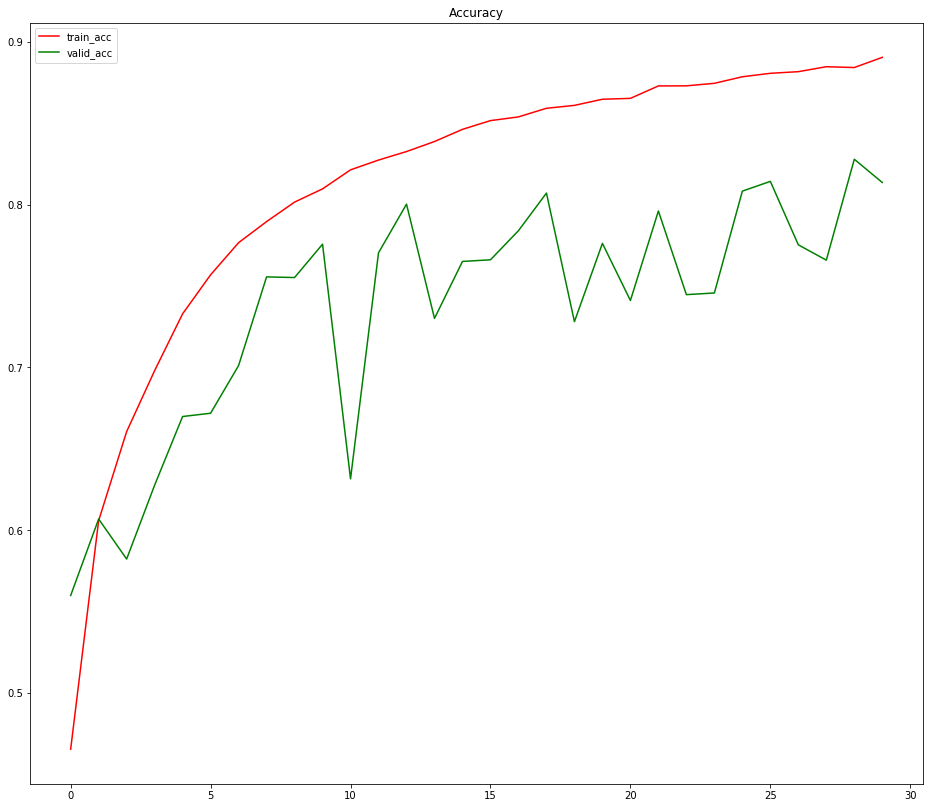

In [10]:
plt.figure(figsize=(16,14))
plt.plot(range(len(train_acc)),train_acc, '-', label='train_acc', color=color_bar[0])
plt.plot(range(len(valid_acc)),valid_acc, '-', label='valid_acc', color=color_bar[1])
plt.title("Accuracy")
plt.legend()
plt.show()